# Analyse exploratoire, traitements, modélisation des données

## 1 - Exploration des données

#### 1.1.1 - Nombre de données, visualisation des colonnes du dataset

In [1]:
import pandas as pd
import numpy as np
from skimpy import skim
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.set_option("display.float_format", lambda x: f"{x :.2f}")
pd.set_option("display.max_columns", None)

In [2]:
# df.to_csv("Maladies_Cardiaques")
# link = 'https://raw.githubusercontent.com/MaskiVal/DataSets/main/heartDisease.csv'
# df = pd.read_csv(link, sep = ",")

In [2]:
df = pd.read_csv("Maladies_Cardiaques.csv", sep = ",")
df.drop(columns=['Unnamed: 0'], inplace=True)
df = df.reset_index().rename(columns={'index': 'id'})

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
'''
| Nom de la colonne | Définition                      | Explication de la variable                      |
|-------------------|---------------------------------|-------------------------------------------------|
| age               | Âge du patient                  | L'âge est utilisé pour évaluer le risque.       |
| sex               | Sexe du patient                 | 1 pour masculin, 0 pour féminin.                |
| cp                | Type de douleur thoracique      | 4 valeurs possibles, de 1 à 4.                  |
| trestbps          | Pression artérielle au repos    | Mesurée en mm Hg au moment de l'admission.      |
| chol              | Cholestérol sérique             | Mesuré en mg/dl.                                |
| fbs               | Glycémie à jeun                 | 1 si > 120 mg/dl, 0 sinon.                      |
| restecg           | Résultats électrocardiographiques au repos | 0 = normal; 1 = ayant des anomalies ST-T; 2 = montrant une hypertrophie ventriculaire probable ou certaine. |
| thalach           | Fréquence cardiaque maximale atteinte | Mesurée en battements par minute.             |
| exang             | Angine induite par l'exercice   | 1 = oui; 0 = non.                               |
| oldpeak           | Dépression du segment ST induite par l'exercice par rapport au repos | Mesurée en mm.        |
| slope             | Pente du segment ST d'exercice  | 1 = montant; 2 = plat; 3 = descendant.          |
| ca                | Nombre de vaisseaux principaux colorés par fluoroscopie | 0-4 vaisseaux.         |
| thal              | Thalassémie                     | 3 = normal; 6 = défaut fixe; 7 = défaut réversible. |
| target            | Diagnostic de maladie cardiaque | 1 = maladie; 0 = pas de maladie.
'''

In [8]:
df

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,0,0,140,241,0,1,123,1,0.20,1,0,3,0
299,299,45,1,3,110,264,0,1,132,0,1.20,1,0,3,0
300,300,68,1,0,144,193,1,1,141,0,3.40,1,2,3,0
301,301,57,1,0,130,131,0,1,115,1,1.20,1,1,3,0


#### 1.1.2 - Observation des types de données

In [6]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 303    │ │ int32       │ 13    │                                                          │
│ │ Number of columns │ 14     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name     ┃ NA   ┃ NA %   ┃ mean     ┃ sd       ┃ p0    ┃ p25     ┃ p50  ┃ p75     ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ age             │    0 │      0 │    54.37 │    9.082 │    29 │    47.5 │   55 │      61 │    77 │ ▁▃▅▇▅▁  │  │
│ │ sex             │    0 │      0 │   0.6832 │    0.466 │     0 │       0 │    1 │       1 │     1 │ ▃    ▇  │  │
│ │ cp              │    0 │      0 │    0.967 │    1.032 │     0 │       0 │    1 │       2 │     3 │ ▇ ▃ ▅▁  │  │
│ │ trestbps        │    0 │      0 │    131.6 │    17.54 │    94 │     120 │  130 │     140 │   200 │  ▃▇▇▃▁  │  │
│ │ chol            │    0 │      0 │    246.3 │    51.83 │   126 │     211 │  240 │   274.5 │   564 │   ▂▇▃   │  │
│ │ fbs             │    0 │      0 │   0.1485 │   0.3562 │     0 │       0 │    0 │       0 │     1 │ ▇    ▁  │  │
│ │ restecg         │    0 │      0 │   0.5281 │   0.5259 │     0 │       0 │    1 │       1 │     2 │  ▇  ▇   │  │
│ │ thalach         │    0 │      0 │    149.6 │    22.91 │    71 │   133.5 │  153 │     166 │   202 │  ▂▃▇▇▁  │  │
│ │ exang           │    0 │      0 │   0.3267 │   0.4698 │     0 │       0 │    0 │       1 │     1 │ ▇    ▃  │  │
│ │ oldpeak         │    0 │      0 │     1.04 │    1.161 │     0 │       0 │  0.8 │     1.6 │   6.2 │  ▇▃▁▁   │  │
│ │ slope           │    0 │      0 │    1.399 │   0.6162 │     0 │       1 │    1 │       2 │     2 │ ▁  ▇ ▇  │  │
│ │ ca              │    0 │      0 │   0.7294 │    1.023 │     0 │       0 │    0 │       1 │     4 │  ▇▃ ▂▁  │  │
│ │ thal            │    0 │      0 │    2.314 │   0.6123 │     0 │       2 │    2 │       3 │     3 │   ▁ ▇▆  │  │
│ │ target          │    0 │      0 │   0.5446 │   0.4988 │     0 │       0 │    1 │       1 │     1 │ ▇    ▇  │  │
│ └─────────────────┴──────┴────────┴──────────┴──────────┴───────┴─────────┴──────┴─────────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### 1.1.3 - Observation des valeurs Null

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### 1.2 - Observation des variables numériques

#### 1.2.1 - Analyse de la distribution

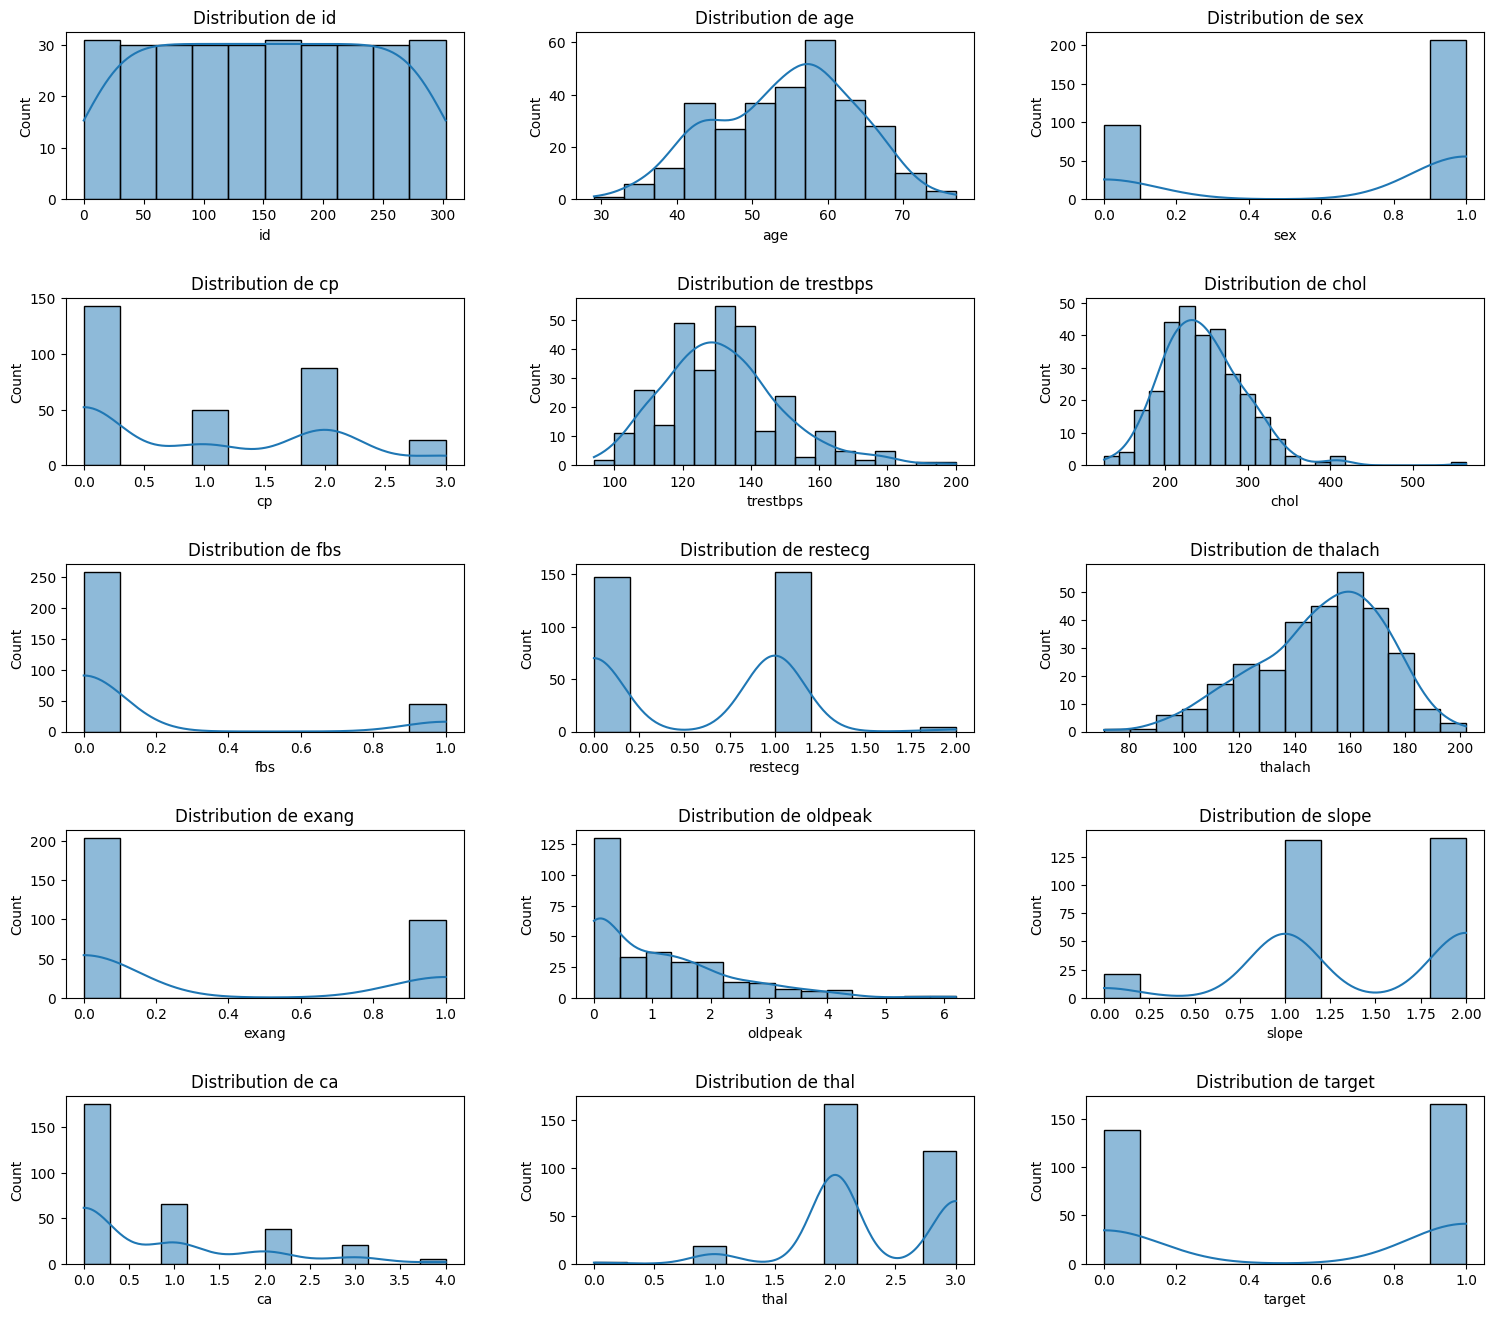

In [21]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 14))
fig.tight_layout(pad=5.0)
columns = df.columns
for ax, col in zip(axes.flatten(), columns):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Distribution de {col}')
plt.show()

#### 1.2.2 - Analyse statique descriptive de base

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [5]:
nombre_inferieur = (df['thalach'] < 70).sum()
print(f"Nombre de valeurs inférieures à 70 dans la colonne 'thalach': {nombre_inferieur}")


Nombre de valeurs inférieures à 70 dans la colonne 'thalach': 0


In [3]:
df['thalach'].describe()

count   303.00
mean    149.65
std      22.91
min      71.00
25%     133.50
50%     153.00
75%     166.00
max     202.00
Name: thalach, dtype: float64

### 1.3 - Observation des variables catégoritielles

#### 1.3.1 - Analyse du nombre de valeurs unique

In [11]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

#### 1.3.2 - Analyse des  statistique de base

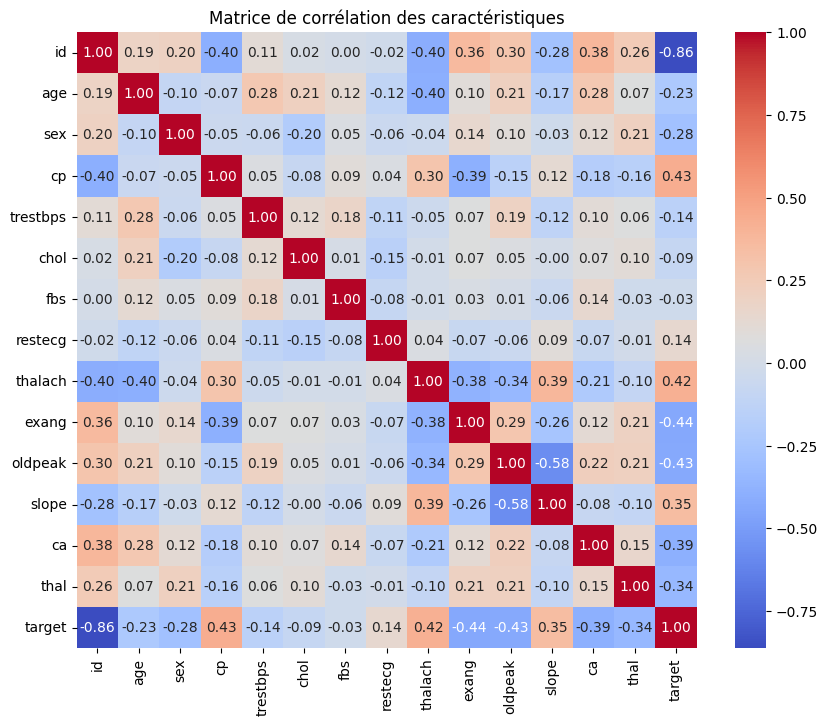

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de corrélation des caractéristiques')
plt.show()


## 2 - Nettoyage des données

### 2.1 - Traitement des valeurs manquantes

In [9]:
valeurs_manquantes = df.isnull().sum()
print("Valeurs manquantes par colonne :")
print(valeurs_manquantes)


Valeurs manquantes par colonne :
id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### 2.2 - Traitement des doublons

In [17]:
df.duplicated(keep=False).sum()

0

In [15]:
df[df.duplicated(keep=False)]

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


### 2.3 - Traitement des valeurs abérantes

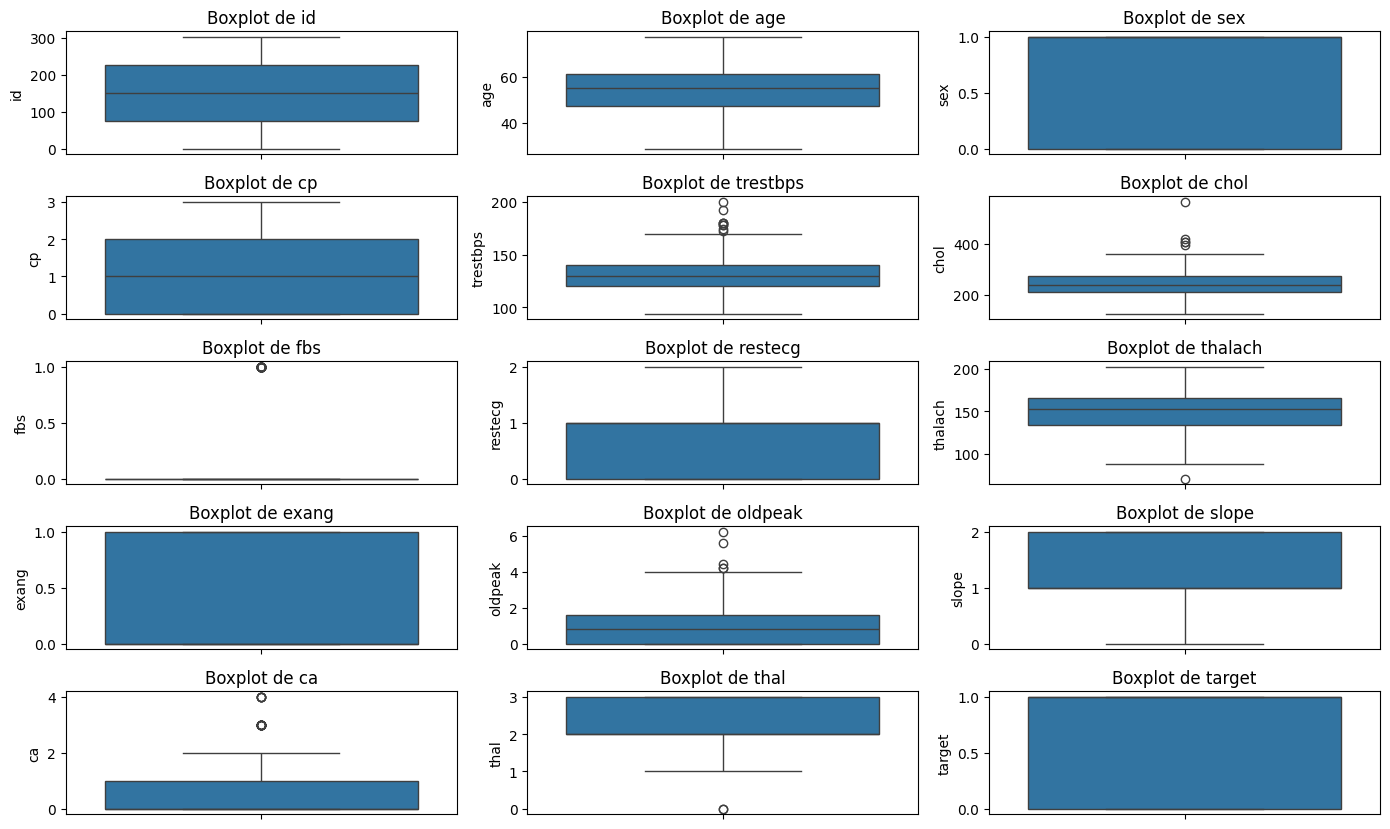

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

colonnes_numeriques = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(14, 10))  # Vous pouvez ajuster la taille globale ici
for i, col in enumerate(colonnes_numeriques):
    plt.subplot(len(colonnes_numeriques) // 3 + 1, 3, i + 1)  # Organise les plots en grille
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()


In [3]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Report")

In [9]:
profile

In [4]:
from scipy.stats import kruskal

# Sélectionner les données de 'thalach' pour chaque groupe
group1 = df[df['target'] == 0]['thalach']
group2 = df[df['target'] == 1]['thalach']

# Effectuer le test de Kruskal
statistic, p_value = kruskal(group1, group2)

# Afficher les résultats
print("Statistique de Kruskal :", statistic)
print("Valeur de p :", p_value)

Statistique de Kruskal : 55.41723088852344
Valeur de p : 9.747822469209607e-14


In [5]:
from scipy.stats import kruskal

# Sélectionner les colonnes numériques
colonnes_numeriques = df.select_dtypes(include=['number']).columns

# Appliquer le test de Kruskal à chaque paire de colonnes
for col in colonnes_numeriques:
    for target_value in df['target'].unique():
        group1 = df[df['target'] == target_value][col]
        for other_target_value in df['target'].unique():
            if other_target_value != target_value:
                group2 = df[df['target'] == other_target_value][col]
                statistic, p_value = kruskal(group1, group2)
                print(f"Variable : {col}, Target {target_value} vs Target {other_target_value} - Statistique de Kruskal : {statistic}, Valeur de p : {p_value}")

Variable : id, Target 1 vs Target 0 - Statistique de Kruskal : 224.70394736842104, Valeur de p : 8.518846903503254e-51
Variable : id, Target 0 vs Target 1 - Statistique de Kruskal : 224.70394736842104, Valeur de p : 8.518846903503254e-51
Variable : age, Target 1 vs Target 0 - Statistique de Kruskal : 17.164047297707278, Valeur de p : 3.4286444446753614e-05
Variable : age, Target 0 vs Target 1 - Statistique de Kruskal : 17.164047297707278, Valeur de p : 3.4286444446753614e-05
Variable : sex, Target 1 vs Target 0 - Statistique de Kruskal : 23.8354585553072, Valeur de p : 1.0493157073364874e-06
Variable : sex, Target 0 vs Target 1 - Statistique de Kruskal : 23.8354585553072, Valeur de p : 1.0493157073364874e-06
Variable : cp, Target 1 vs Target 0 - Statistique de Kruskal : 64.1424146048031, Valeur de p : 1.1574276422291982e-15
Variable : cp, Target 0 vs Target 1 - Statistique de Kruskal : 64.1424146048031, Valeur de p : 1.1574276422291982e-15
Variable : trestbps, Target 1 vs Target 0 - St

In [ ]:
'''La statistique de Kruskal est une mesure de la variation entre les moyennes des groupes.

Plus la valeur de la statistique est grande, plus il y a de différences significatives entre les groupes.

La valeur de p est la probabilité que les différences observées entre les groupes soient dues au hasard.
Si la valeur de p est inférieure à un seuil prédéfini (généralement 0.05), on rejette l'hypothèse nulle selon laquelle les groupes ont des moyennes égales.

Si une valeur de p est supérieure on ne dispose pas de suffisamment de preuves pour rejeter l'hypothèse nulle.
Cela signifie qu'il n'y a pas suffisamment de preuves pour conclure que les moyennes des groupes sont significativement différentes.
'''

## 3 - Modélisation des données

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Création d'un objet StandardScaler
scaler = StandardScaler()

# Standardisation des données comme Income par exemple ici
df['Income_std'] = scaler.fit_transform(df[['Income']])

In [ ]:
'''Decision Tree'''

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

modelDTR = DecisionTreeClassifier()
modelDTR.fit(X_train, y_train)

train_r2 = modelDTR.score(X_train, y_train)
test_r2 = modelDTR.score(X_test, y_test)

print("R² Score train set :", train_r2)
print("R² Score test set :", test_r2)

In [ ]:
'''Logistic Regression'''

from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression().fit(X_train, y_train)

print("Accuracy Score train set :", modelLR.score(X_train, y_train))
print("Accuracy Score test set :", modelLR.score(X_test, y_test))

In [ ]:
'''KNN'''

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, modelKNN.predict(X_train))
test_accuracy = accuracy_score(y_test, modelKNN.predict(X_test))

print("Accuracy Score train set :", train_accuracy)
print("Accuracy Score test set :", test_accuracy)

In [ ]:
'''Random Forest'''

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest R²: {r2_rf}")

In [ ]:
# Initialize and train models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

train_scores = {}
test_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    train_scores[name] = train_score
    test_scores[name] = test_score

# Print scores
print("Train set scores:")
for name, score in train_scores.items():
    print(f"{name}: {score}")

print("\nTest set scores:")
for name, score in test_scores.items():
    print(f"{name}: {score}")
